<a href="https://colab.research.google.com/github/bassoline/DeepLearning/blob/main/BinaryClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

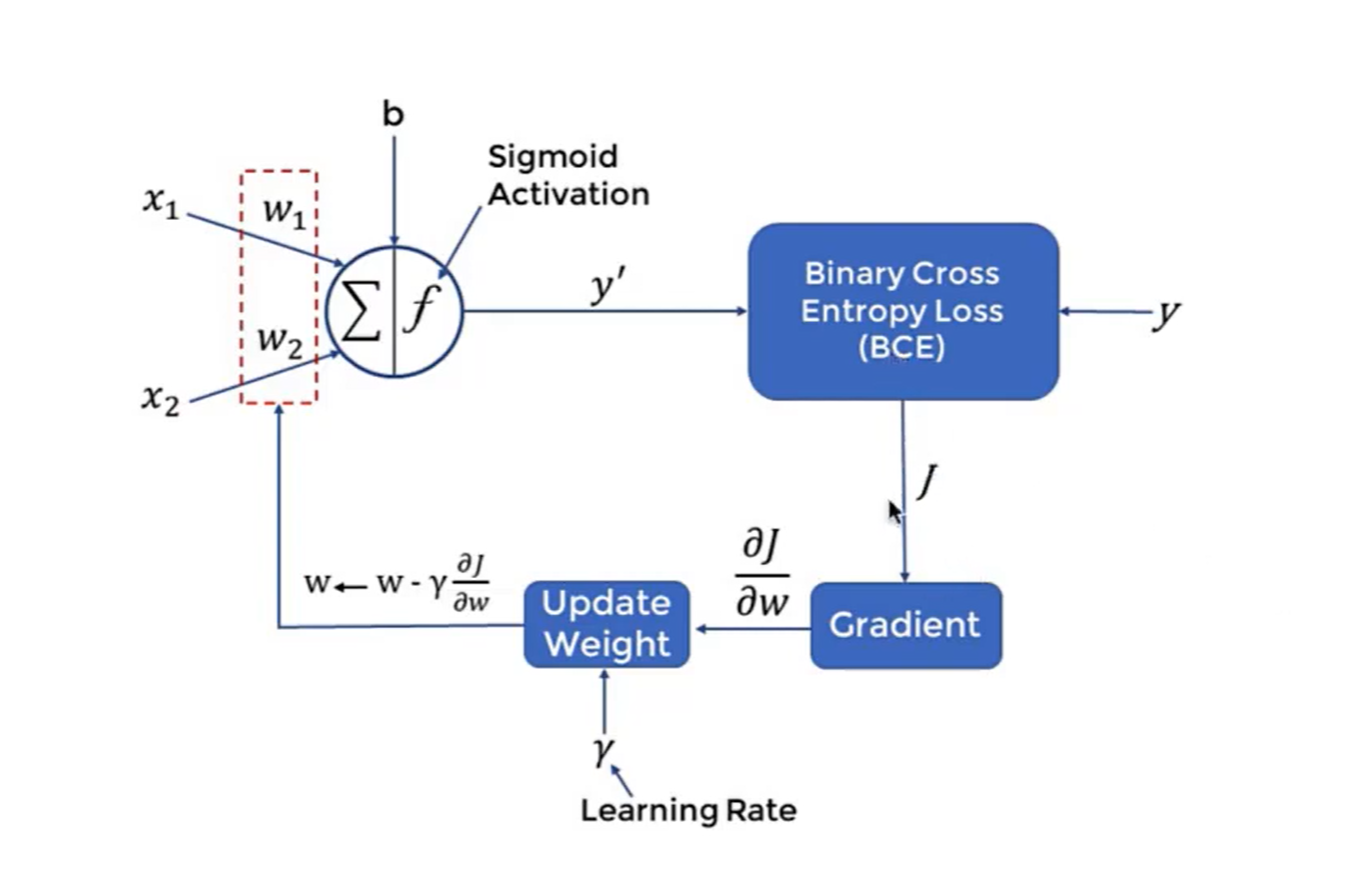

# Sigmoid activation function 

o(z) = 1 / (1 + e^(-z) ) = y'

z = w1*x1 + w2*x2 + b 

x1, x2 are inputs 

w1, w2 are weights 

b is the bias term 


# Loss function (Binary Cross Entropy Loss)
J(y') = -y * log(y') - (1-y) * log(1-y')

# Backpropagation (Gradient)
dJ / dw1 = (dJ / dy') * (dy' / dz) * (dz / dw1)

dJ / dw2 = (dJ / dy') * (dy' / dz) * (dz / dw2)

dJ / db = (dJ / dy') * (dy' / dz) * (dz / db)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import torch
import numpy as np
import random

plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')

In [ ]:
# for reproducibility 
seed = 3
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [ ]:
# generate inputs 
num_data_points = 500 
class_zero_points = torch.empty(num_data_points, 2).normal_(mean=2, std=0.5)
class_one_points = torch.empty(num_data_points, 2).normal_(mean=4, std=0.7)

Text(0, 0.5, 'x2')

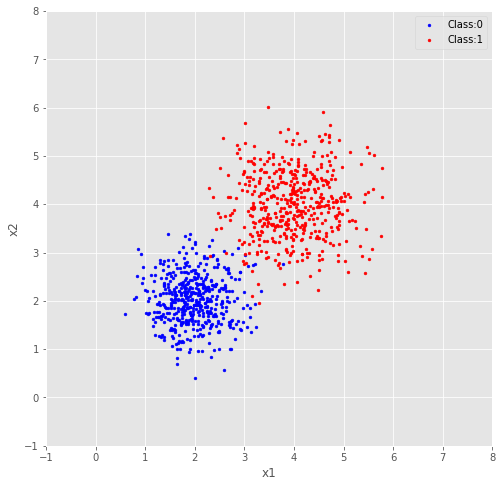

In [ ]:
# plot input data 
plt.scatter(class_zero_points[:, 0], class_zero_points[:, 1], s=8, color='b', label='Class:0')
plt.scatter(class_one_points[:, 0], class_one_points[:, 1], s=8, color='r', label='Class:1')
plt.legend()
plt.xlim([-1, 8])
plt.ylim([-1, 8])
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
# Prepare data 
label_zero = torch.zeros_like(class_zero_points[:,0], dtype=int)
label_one =  torch.ones_like(class_one_points[:,0], dtype=int)

labels = torch.cat([label_zero, label_one])
data_points = torch.cat([class_zero_points, class_one_points], dim=0)
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Perceptron 
# w1 * x1 + w2 * x2 + b = WX + b = z 
def wx_plus_b(W, X, B):
  return torch.matmul(X,W) + B 

# gradient 
# dz / dw = X | dz/dB = 1 
def grad_wx_plus_b(X): 
  return X, torch.ones(X.size(0))


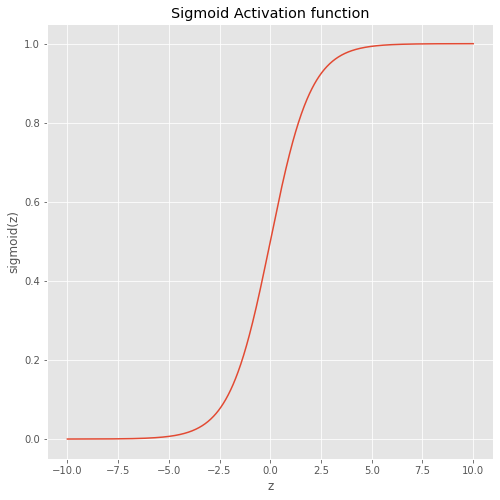

In [ ]:
# sigmoid 
z = torch.linspace(-10, 10, 1000)
y = torch.sigmoid(z)

plt.figure
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Activation function')
plt.show()

In [ ]:
# Sigmoid 
def sigmoid(x):
  # squeeze just removed the extra wrapped dim from (size, 1) -> (size)
  return torch.sigmoid(x).squeeze() 

def grad_sigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Binary Cross Entropy Loss 

** y = ground_truth && y' = predicted ** 

J(y') = -ylog(y') - (1-y)log(1-y')

Since there are only classes 

y = 1 -> J(y') = -log(y')

y = 0 -> J(y') = -log(1-y')

Gradient for loss 

dJ / dy' = - (y/y') + (1-y) / (1 - y') 

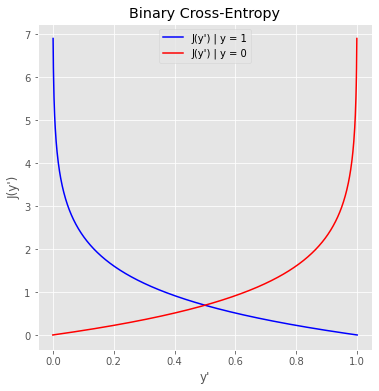

In [ ]:
# cross entropy plot y =1 
plt.rcParams["figure.figsize"] = (6, 6)
x = torch.linspace(0, 1, 1000)
y1 = -torch.log(x)
y0 = -torch.log(1-x)

plt.figure
plt.plot(x, y1, color='b', label="J(y') | y = 1")
plt.plot(x, y0, color='r', label="J(y') | y = 0")
plt.xlabel("y'")
plt.ylabel("J(y')")
plt.legend(loc='upper center')
plt.title('Binary Cross-Entropy')
plt.show()

Let's say a data point belongs to class 1 ( Blue Curve ). If the output of the network is close to 0, then from the above diagram we can see that the loss will be very high ( The blue curve goes to infinity ). Conversely, the loss is 0 if the output of the network is 1.

The same logic goes for the red curve.

Thus, this loss function accurately captures the binary classification error - i.e. the error is high when the predicted output is different from the ground truth and vice-versa. Thus, it is the correct loss function for solving a binary classification problem.

In [ ]:
# Binary cross-entropy
def bce_loss(sigmoid_pred, g_truth):
    loss = - (1 - g_truth)* torch.log(1 - sigmoid_pred) - g_truth * torch.log(sigmoid_pred)
    return loss

# Derivative of binary cross-entropy w.r.t its input.
def grad_bce_loss(sigmoid_pred, g_truth):
    return - (g_truth * (1 / sigmoid_pred)) + ((1 - g_truth) * (1 / (1 - sigmoid_pred)))

In [ ]:
class BinaryClassifierGraph: 
  def __init__(self): 
    """
    Initializing the variables that will be updated in `forward` and `loss` function. 
    These values will be used in `backward` function to get the gradient.
    """
    # default gardient is zero
    self.w0_grad = 0
    self.w1_grad = 0
    self.b_grad = 0

    self.x_in = None
    self.wx_plus_b_out = None
    self.sigmoid_out = None

    self.bce_loss = None
    self.grad_bce_loss = None

    self.g_truth = None
  
  def forward(self, w, x, b):
    # updated input value, it will be used in backward pass
    self.x_in = x
    self.b_in = b
    self.w_in = w

    # Intermediate node with the weighted sum
    self.wx_plus_b_out = wx_plus_b(w, x, b)

    # Output node after applying activation function
    self.sigmoid_out = sigmoid(self.wx_plus_b_out)
        
    return self.sigmoid_out

  def backward(self):
    # Compute the gradients of Loss w.r.t neuron output (y')
    d_bce_loss = grad_bce_loss(self.sigmoid_out, self.g_truth)

    # Compute the gradients of neuron output(y') w.r.t weighted sum(z)
    d_sigmoid = grad_sigmoid(self.wx_plus_b_out)

    # Compute the gradients of weighted sum(z) w.r.t weights and bias
    d_w, d_b = grad_wx_plus_b(self.x_in)

    # Using chain rule to find overall gradient of Loss w.r.t weights and bias
    self.w0_grad = d_bce_loss * d_sigmoid * d_w[:,0]
    self.w1_grad = d_bce_loss * d_sigmoid * d_w[:,1]
    self.b_grad = d_bce_loss * d_sigmoid * d_b
        
    return

  def loss(self, g_truth):
    self.g_truth = g_truth

    # Compute the binary cross entropy loss
    self.bce_loss = bce_loss(self.sigmoid_out, g_truth)
    return self.bce_loss.mean()
  
  def gradients(self):    
    w_grad = torch.tensor([[self.w0_grad.mean()], [self.w1_grad.mean()]])
    b_grad = torch.tensor([self.b_grad.mean()])
    
    return w_grad, b_grad
  

In [ ]:
def gradient_descent_update(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return w, b

In [ ]:
import time 
def train(w, b, data_points, label, epochs=100, lr=0.01, batch_size=10):
  bc = BinaryClassifierGraph()
  avg_train_loss = np.array([])
  num_batches = int(len(label)/batch_size)
  updated_params = []
  for epoch in range(epochs):
    avg_loss = np.array([])
    # shuffle data and label 
    # if you don't shuffle it could bias your training process 
    shuffled_index = random.sample(range(len(label)), len(label))
    s_data_points = data_points[shuffled_index]
    s_label = label[shuffled_index]
    print('\nEpoch: {}'.format(epoch+1))
    for batch_idx in range(num_batches):
      start_index = batch_idx * batch_size
      end_index = (batch_idx + 1) * batch_size
      data = s_data_points[start_index: end_index]
      g_truth = s_label[start_index: end_index]

      # forward pass 
      bc.forward(w, data, b)
      # Find loss 
      loss = bc.loss(g_truth)
      # backward finds the gradients 
      bc.backward()
      grad_w, grad_b = bc.gradients()
      # Update parameters using gradient descent 
      w, b = gradient_descent_update(w, b, grad_w, grad_b, lr)


      # show training results 
      avg_loss = np.append(avg_loss, [loss])
      avg_train_loss = np.append(avg_train_loss, [loss])
      time.sleep(0.001)
      print("\rBatch: {0}/{1} | Avg Batch Loss: {2:.3} | Batch Loss: {3:.3} | Avg Train Loss:{4:.3}".
          format(batch_idx+1, num_batches, avg_loss.mean(), loss.item(), avg_train_loss.mean()), end="")
      
    #storing parameters to show decision boundary animation
    updated_params.append((w.data[0][0].clone(), w.data[1][0].clone(), b.data[0].clone()))
  return w, b, avg_train_loss, updated_params




In [ ]:
input_size = 2
w = torch.randn(input_size, 1)
b = torch.zeros(1)

w, b, avg_train_loss, updated_parms= train(w, b, data_points, labels)
print('\nw:\n{}'.format(w))
print('\nb:\n{}'.format(b))


Epoch: 1
Batch: 100/100 | Avg Batch Loss: 0.93 | Batch Loss: 0.608 | Avg Train Loss:0.93
Epoch: 2
Batch: 100/100 | Avg Batch Loss: 0.642 | Batch Loss: 0.646 | Avg Train Loss:0.786
Epoch: 3
Batch: 100/100 | Avg Batch Loss: 0.622 | Batch Loss: 0.534 | Avg Train Loss:0.731
Epoch: 4
Batch: 100/100 | Avg Batch Loss: 0.602 | Batch Loss: 0.67 | Avg Train Loss:0.699
Epoch: 5
Batch: 100/100 | Avg Batch Loss: 0.584 | Batch Loss: 0.724 | Avg Train Loss:0.676
Epoch: 6
Batch: 100/100 | Avg Batch Loss: 0.566 | Batch Loss: 0.679 | Avg Train Loss:0.658
Epoch: 7
Batch: 100/100 | Avg Batch Loss: 0.549 | Batch Loss: 0.493 | Avg Train Loss:0.642
Epoch: 8
Batch: 100/100 | Avg Batch Loss: 0.534 | Batch Loss: 0.506 | Avg Train Loss:0.629
Epoch: 9
Batch: 100/100 | Avg Batch Loss: 0.519 | Batch Loss: 0.584 | Avg Train Loss:0.616
Epoch: 10
Batch: 100/100 | Avg Batch Loss: 0.505 | Batch Loss: 0.474 | Avg Train Loss:0.605
Epoch: 11
Batch: 100/100 | Avg Batch Loss: 0.491 | Batch Loss: 0.568 | Avg Train Loss:0.595

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams["figure.figsize"] = (10, 10)

fig, ax = plt.subplots()

ax.set_xlim(-1, 8)
ax.set_ylim(-1, 8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

line, = ax.plot(0, 0, color='g', label='Decision Boundary')
ax.scatter(class_zero_points[:,0], class_zero_points[:,1], s=8, color='b', label='Class:0')
ax.scatter(class_one_points[:,0], class_one_points[:,1], s=8, color='r', label='Class:1')
ax.legend(loc='upper right')

def plot_points_line(parm, line):
    x1 = torch.linspace(-1, 8, 1000)
    x2 = -(parm[2] + parm[0] * x1)/ parm[1]
    line.set_xdata(x1)
    line.set_ydata(x2)
    
    return line, 
    

line_animation = animation.FuncAnimation(fig, func=plot_points_line, frames=updated_parms, fargs=(line,),
                                         interval=200)
rc('animation', html='jshtml')
line_animation

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


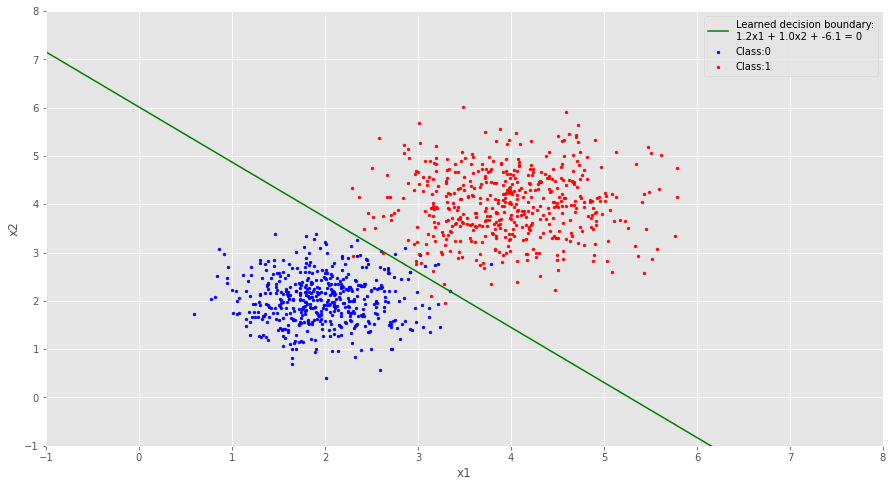

In [ ]:
# solution
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
plt.figure
plt.scatter(class_zero_points[:,0], class_zero_points[:,1], s=8, color='b', label='Class:0')
plt.scatter(class_one_points[:,0], class_one_points[:,1], s=8, color='r', label='Class:1')
x1 = torch.linspace(-1, 8, 1000)
x2 = -(b.data[0] + w.data[0][0] * x1)/ w.data[1][0]
plt.plot(x1, x2, c='g', label='Learned decision boundary:\n{0:.2}x1 + {1:.2}x2 + {2:.2} = 0'.
         format(w.data[0][0], w.data[1][0], b.data[0]))
plt.legend()
plt.xlim([-1, 8])
plt.ylim([-1, 8])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

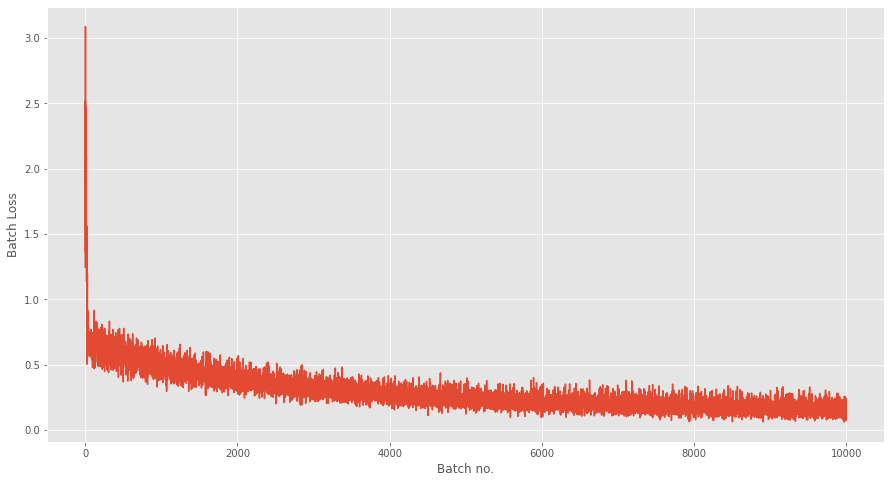

In [ ]:
#loss curve
plt.rcParams["figure.figsize"] = (15, 8)
plt.figure
plt.plot(range(len(avg_train_loss)), avg_train_loss)
plt.xlabel('Batch no.')
plt.ylabel('Batch Loss')
plt.show()

In [ ]:
def accuracy(w, b, inputs, label):
    bc = BinaryClassifierGraph()
    prediction = bc.forward(w, inputs, b)
    pred = prediction >= 0.5
    pred = pred.squeeze()
    label = label.type(torch.bool)
    count = len(label)
    
    correct_pred = torch.sum(torch.eq(pred, label))
    accuracy = correct_pred * 1.0/count
    return accuracy
accuracy(w, b, data_points, labels)

tensor(0.9880)